# Importe de librerias

In [ ]:
#importar librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import copy


## Función de clasificación de salida

In [ ]:
def classFunBack(ak,a,b):  # Variable, rango inferior, lim sup
  if(ak <= a):
    z = 0
  elif( a < ak <= b):
    z = 0.5   
  else:
    z = 1
  return z

# Punto 1 Divida los datos en 3 grupos:
 Entrenamiento, Prueba y validación.






Dividir los dato - check

In [ ]:
# Leer datos
data = pd.read_excel('Datos IRIS.xlsx')
lista = data.columns
data.columns = ['x1','x2','x3','x4','nombre','clase']
data.loc[len(data)] = lista
target_row = len(data)-1
idx = [target_row] + [i for i in range(len(data)) if i != target_row]
data = data.iloc[idx].reset_index(drop=True)
data

,x1,x2,x3,x4,nombre,clase
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3
146,6.3,2.5,5.0,1.9,Iris-virginica,3
147,6.5,3.0,5.2,2.0,Iris-virginica,3
148,6.2,3.4,5.4,2.3,Iris-virginica,3


In [ ]:
index_1 = [i for i in range(len(data)) if data['clase'][i] == 1]
index_2 = [i for i in range(len(data)) if data['clase'][i] == 2]
index_3 = [i for i in range(len(data)) if data['clase'][i] == 3]

data_1 = data.iloc[index_1[0]:index_1[-1]+1]
data_1_train = pd.DataFrame(columns=['x1','x2','x3','x4','nombre','clase'])
data_1_test = pd.DataFrame(columns=['x1','x2','x3','x4','nombre','clase'])
data_1_validation = pd.DataFrame(columns=['x1','x2','x3','x4','nombre','clase'])
data_2 = data.iloc[index_2[0]:index_2[-1]+1]
data_2_train = pd.DataFrame(columns=['x1','x2','x3','x4','nombre','clase'])
data_2_test = pd.DataFrame(columns=['x1','x2','x3','x4','nombre','clase'])
data_2_validation = pd.DataFrame(columns=['x1','x2','x3','x4','nombre','clase'])
data_3 = data.iloc[index_3[0]:index_3[-1]+1]
data_3_train = pd.DataFrame(columns=['x1','x2','x3','x4','nombre','clase'])
data_3_test = pd.DataFrame(columns=['x1','x2','x3','x4','nombre','clase'])
data_3_validation = pd.DataFrame(columns=['x1','x2','x3','x4','nombre','clase'])

porcentaje_train_1 = int(70*len(data_1)/100)
porcentaje_train_2 = int(70*len(data_2)/100)
porcentaje_train_3 = int(70*len(data_3)/100)
porcentaje_test_1 = int(20*len(data_1)/100)
porcentaje_test_2 = int(20*len(data_2)/100)
porcentaje_test_3 = int(20*len(data_3)/100)
porcentaje_validation_1 = int(10*len(data_1)/100)
porcentaje_validation_2 = int(10*len(data_2)/100)
porcentaje_validation_3 = int(10*len(data_3)/100)

lon_1 = np.arange(0,len(data_1))
np.random.shuffle(lon_1)
lon_2 = np.arange(0,len(data_2))
np.random.shuffle(lon_2)
lon_3 = np.arange(0,len(data_3))
np.random.shuffle(lon_3)

for i in range(len(lon_1)):
  if(i<porcentaje_train_1):
    data_1_train.loc[i] = data_1.iloc[lon_1[i]]
  elif (i<porcentaje_train_1+porcentaje_test_1):
    data_1_test.loc[i] = data_1.iloc[lon_1[i]]
  elif (i<porcentaje_train_1+porcentaje_test_1+porcentaje_validation_1):
    data_1_validation.loc[i] = data_1.iloc[lon_1[i]]

for i in range(len(lon_2)):
  if(i<porcentaje_train_2):
    data_2_train.loc[i] = data_2.iloc[lon_2[i]]
  elif (i<porcentaje_train_2+porcentaje_test_2):
    data_2_test.loc[i] = data_2.iloc[lon_2[i]]
  elif (i<porcentaje_train_2+porcentaje_test_2+porcentaje_validation_2):
    data_2_validation.loc[i] = data_2.iloc[lon_2[i]]

for i in range(len(lon_3)):
  if(i<porcentaje_train_3):
    data_3_train.loc[i] = data_3.iloc[lon_3[i]]
  elif (i<porcentaje_train_3+porcentaje_test_3):
    data_3_test.loc[i] = data_3.iloc[lon_3[i]]
  elif (i<porcentaje_train_3+porcentaje_test_3+porcentaje_validation_3):
    data_3_validation.loc[i] = data_3.iloc[lon_3[i]]

In [ ]:
data_train = pd.concat([data_1_train,data_2_train,data_3_train])
data_train.reset_index(inplace=True, drop=False)
del data_train["index"]
data_train

,x1,x2,x3,x4,nombre,clase
0,4.6,3.4,1.4,0.3,Iris-setosa,1
1,4.6,3.1,1.5,0.2,Iris-setosa,1
2,5.1,3.5,1.4,0.2,Iris-setosa,1
3,5.1,3.4,1.5,0.2,Iris-setosa,1
4,4.8,3.0,1.4,0.3,Iris-setosa,1
...,...,...,...,...,...,...
100,7.2,3.6,6.1,2.5,Iris-virginica,3
101,6.3,2.8,5.1,1.5,Iris-virginica,3
102,5.8,2.7,5.1,1.9,Iris-virginica,3
103,6.2,2.8,4.8,1.8,Iris-virginica,3


In [ ]:
data_test = pd.concat([data_1_test,data_2_test,data_3_test])
data_test.reset_index(inplace=True, drop=False)
data_test

,index,x1,x2,x3,x4,nombre,clase
0,35,5.4,3.7,1.5,0.2,Iris-setosa,1
1,36,5.7,3.8,1.7,0.3,Iris-setosa,1
2,37,4.8,3.4,1.9,0.2,Iris-setosa,1
3,38,5.4,3.4,1.7,0.2,Iris-setosa,1
4,39,5.0,3.4,1.5,0.2,Iris-setosa,1
5,40,5.0,3.4,1.6,0.4,Iris-setosa,1
6,41,5.4,3.9,1.7,0.4,Iris-setosa,1
7,42,4.3,3.0,1.1,0.1,Iris-setosa,1
8,43,5.8,4.0,1.2,0.2,Iris-setosa,1
9,44,4.5,2.3,1.3,0.3,Iris-setosa,1


In [ ]:
data_validation = pd.concat([data_1_validation,data_2_validation,data_3_validation])
data_validation.reset_index(inplace=True, drop=False)
data_validation

,index,x1,x2,x3,x4,nombre,clase
0,45,5.2,3.5,1.5,0.2,Iris-setosa,1
1,46,4.6,3.2,1.4,0.2,Iris-setosa,1
2,47,5.2,3.4,1.4,0.2,Iris-setosa,1
3,48,5.0,3.6,1.4,0.2,Iris-setosa,1
4,49,5.1,3.3,1.7,0.5,Iris-setosa,1
5,45,5.7,2.6,3.5,1.0,Iris-versicolor,2
6,46,5.9,3.2,4.8,1.8,Iris-versicolor,2
7,47,5.6,3.0,4.1,1.3,Iris-versicolor,2
8,48,5.0,2.0,3.5,1.0,Iris-versicolor,2
9,49,6.0,2.9,4.5,1.5,Iris-versicolor,2


In [ ]:
data_train.to_excel("Datos_Train.xlsx")
data_test.to_excel("Datos_Test.xlsx")
data_validation.to_excel("Datos_Validation.xlsx")

# Punto 2: Selección de los descriptores

In [ ]:
data_train.describe()

In [ ]:
del data_train["nombre"]
data_train
#dfNorm = data_train.apply(lambda x: (x-x.min())/ (x.max()- x.min()), axis=0)
#dfNorm

,x1,x2,x3,x4,clase
0,4.6,3.4,1.4,0.3,1
1,4.6,3.1,1.5,0.2,1
2,5.1,3.5,1.4,0.2,1
3,5.1,3.4,1.5,0.2,1
4,4.8,3.0,1.4,0.3,1
...,...,...,...,...,...
100,7.2,3.6,6.1,2.5,3
101,6.3,2.8,5.1,1.5,3
102,5.8,2.7,5.1,1.9,3
103,6.2,2.8,4.8,1.8,3


In [ ]:
data_train_norm = data_train.apply(lambda x: (x-x.min())/ (x.max()- x.min()), axis=0)
data_train_norm

,x1,x2,x3,x4,clase
0,0.057143,0.545455,0.067797,0.083333,0.0
1,0.057143,0.409091,0.084746,0.041667,0.0
2,0.200000,0.590909,0.067797,0.041667,0.0
3,0.200000,0.545455,0.084746,0.041667,0.0
4,0.114286,0.363636,0.067797,0.083333,0.0
...,...,...,...,...,...
100,0.800000,0.636364,0.864407,1.000000,1.0
101,0.542857,0.272727,0.694915,0.583333,1.0
102,0.400000,0.227273,0.694915,0.750000,1.0
103,0.514286,0.272727,0.644068,0.708333,1.0


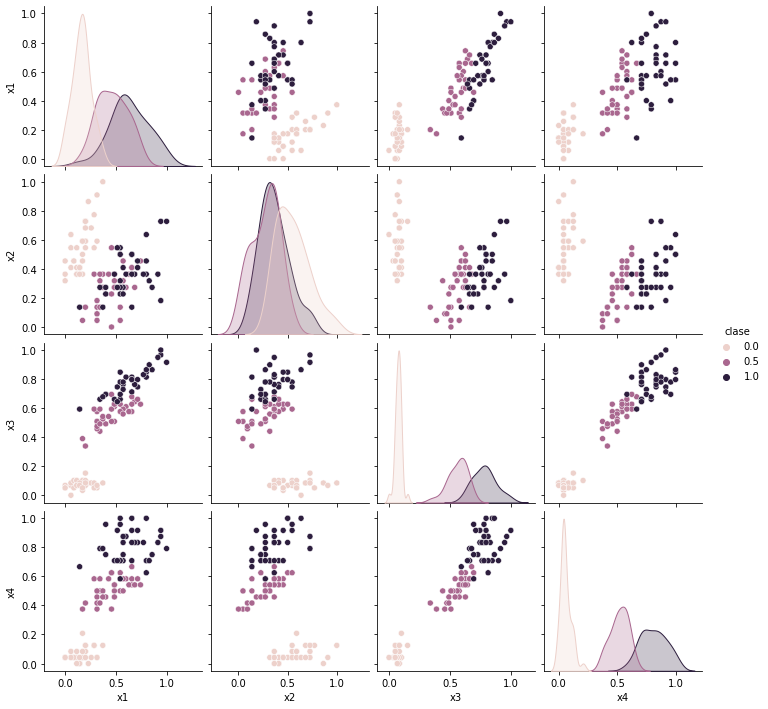

In [ ]:
sns.pairplot(data_train_norm,hue='clase')

# Punto 3
Red neuronal monocapa

## Cargar datos de entrenamiento 

Los datos se dividieron de forma aleatoria, pero se exportaron en formato '.xlsx'para evitar que en cada ejecución del notebook se modifiquen. 

In [100]:
#Cargar datos de entrenamiento 
d_train = pd.read_excel('Datos_Train.xlsx')
d_train

,Unnamed: 0,index,x1,x2,x3,x4,nombre,clase
0,0,0,4.8,3.1,1.6,0.2,Iris-setosa,1
1,1,1,5.1,3.4,1.5,0.2,Iris-setosa,1
2,2,2,4.8,3.4,1.6,0.2,Iris-setosa,1
3,3,3,4.4,3.0,1.3,0.2,Iris-setosa,1
4,4,4,4.6,3.4,1.4,0.3,Iris-setosa,1
...,...,...,...,...,...,...,...,...
100,100,30,5.7,2.5,5.0,2.0,Iris-virginica,3
101,101,31,7.7,3.0,6.1,2.3,Iris-virginica,3
102,102,32,6.5,3.0,5.5,1.8,Iris-virginica,3
103,103,33,6.3,3.3,6.0,2.5,Iris-virginica,3


Una vez caragados los datos de entrenamiento, hay que depurarlos, eliminar las columnas no representativas como el index o el nombre, y por ultimo, normalizarlos

In [101]:
#d_train = data_train_norm.copy()
del d_train["x1"]
del d_train["x2"]
del d_train["index"]
del d_train["nombre"]
del d_train["Unnamed: 0"]
d_train = d_train.apply(lambda x: (x-x.min())/ (x.max()- x.min()), axis=0)
d_train


,x3,x4,clase
0,0.105263,0.041667,0.0
1,0.087719,0.041667,0.0
2,0.105263,0.041667,0.0
3,0.052632,0.041667,0.0
4,0.070175,0.083333,0.0
...,...,...,...
100,0.701754,0.791667,1.0
101,0.894737,0.916667,1.0
102,0.789474,0.708333,1.0
103,0.877193,1.000000,1.0


Hacer aleatorios los datos de entrenamiento




In [102]:
vector_random = np.arange(0,len(d_train))
np.random.shuffle(vector_random)
d_train_aleatorio = pd.DataFrame(columns=['x3','x4','clase'])
for i in range(len(vector_random)):
  d_train_aleatorio.loc[i] = d_train.iloc[vector_random[i]]

bias = np.ones(len(d_train))
d_train_aleatorio

,x3,x4,clase
0,0.087719,0.041667,0.0
1,0.070175,0.041667,0.0
2,0.070175,0.041667,0.0
3,0.736842,0.791667,1.0
4,0.070175,0.041667,0.0
...,...,...,...
100,0.807018,0.708333,1.0
101,0.526316,0.375000,0.5
102,0.684211,0.708333,1.0
103,0.719298,0.750000,1.0


## Algoritmo LMS
Red monocapa, 3 entradas, 2 descriptores mas el bias. una neurona con función de activación lineal. 

In [ ]:
# Iniciar con unos pesos aleatorios
wo = np.random.rand(3)

x = [0,0,0] #Vector de entradas
E = []      #Vector de errores por cada entrada

In [ ]:
e_min = 0.1  #Error minimo objetivo
mu = 1e-6    #Paso
Ep = 1.0      #Error Promedio de epoca
flag = True   #Bandera de terminación de algoritmo
cont = 0      #Contador de Iteraciones del while
errorHist = []#Vector historico de error promedio
while(flag):
  E = []      #Vaciar vector de errores 

  for i in range(len(d_train_aleatorio)):   #Recorere el data set de entrenamiento
    x[0] = d_train_aleatorio.iloc[i,0]      #Leer Descriptores de fila i
    x[1] = d_train_aleatorio.iloc[i,1]
    x[2] = 1                                #Bias
    y = d_train_aleatorio.iloc[i,2]         #Leer la clase de la fila i
    g = np.dot(x,wo)                        #Computar el estado interno de la neurona
    e = g-y                                 #Error para la muestra i
    x =  np.dot(x,e)                        #Gradiente de ERROR
    wo = wo-np.multiply(x,mu)               #Actualizar Vector de Pesos
    E.append(np.abs(e))                             #Almacenar error de cada muestra para calcular error promedio
  cont = cont+1                             #Incrementar el contador de iteraciones del while
  Ep = np.mean(E)                           #Calcular error promedio
  errorHist.append(Ep)                      #Almacenar Err promedio
  print(Ep)
  if(Ep <= e_min):
    flag = False
print('Iteraciones', cont)



Se han truncado las últimas 5000 líneas del flujo de salida.
0.10137910603707746
0.10137882086128529
0.10137853568927119
0.10137825052103507
0.10137796535657691
0.10137768019589669
0.1013773950389943
0.10137710988586975
0.10137682473652293
0.10137653959095386
0.10137625444916246
0.10137596931114863
0.10137568417691238
0.10137539904645364
0.10137511391977233
0.10137482879686845
0.10137454367774196
0.10137425856239271
0.10137397345082078
0.10137368834302603
0.10137340323900847
0.10137311813876795
0.10137283304230456
0.10137254794961811
0.10137226286070865
0.10137197777557609
0.10137169269422039
0.10137140761664148
0.10137112254283932
0.10137083747281385
0.10137055240656508
0.1013702673440929
0.10136998228539724
0.10136969723047812
0.10136941217933541
0.10136912713196915
0.10136884208837924
0.10136855704856558
0.10136827201252818
0.10136798698026699
0.10136770195178196
0.10136741692707303
0.10136713190614012
0.10136684688898327
0.10136656187560232
0.10136627686599729
0.10136599186016808
0

Pesos Optimos  [ 0.86827173  0.28559754 -0.04097809] 




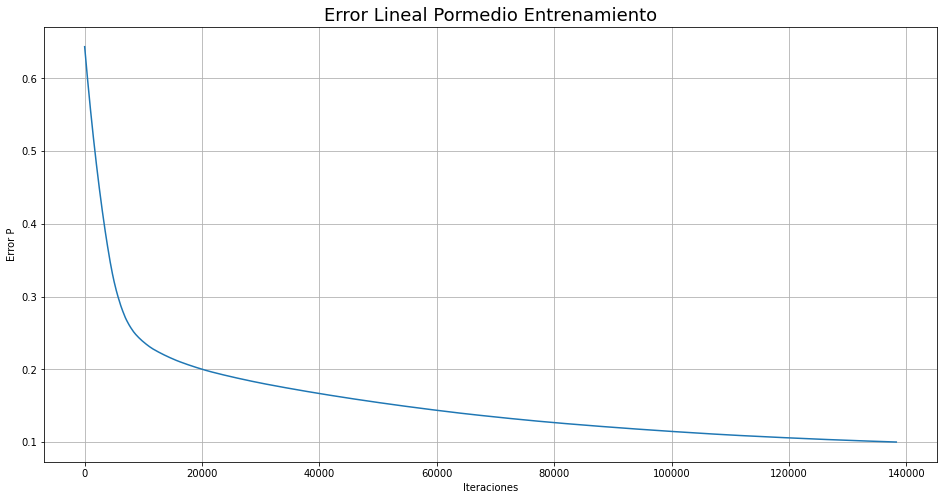

In [ ]:
print('Pesos Optimos ', wo, '\n\n')
# Make the plot\n",
plt.figure(figsize=(16,8)) #Tamaño de la figura \n",
plt.plot(errorHist)
plt.xlabel("Iteraciones")
plt.ylabel("Error P")
plt.title("Error Lineal Pormedio Entrenamiento", fontsize = 18)
plt.grid()
plt.show()

## Fronteras de decisión

Analizando los datos de salida de la red neuronal en su etapa de entrenamiento se definen 2 umbrales para clasificar "Traducir" la salida de la red y especificar a un "usuario final" que clase asignó la red a la flor que ingreso. 

In [184]:
a = 0.25
b = 0.74

## Error de entrenamiento
Pasar los datos de entrenamiento por la red entrenada
El error se analizó de dos formas, un promedio lineal, ie, que tan alejados estan los valores obtenidos de los deseados, y de forma porcentual implementado una función de redondeo a una clase en especifico y condando el número de aciertos

In [185]:
#wo = [ 0.86827173,  0.28559754, -0.04097809] 
z = 0 #Variable de salida al usuario
contErrPrueba = 0
E = []

for i in range(len(d_train_aleatorio)):  #Recorrer el data set de prueba
  x[0] = d_train_aleatorio.iloc[i,0]      #Leer Descriptores de fila i
  x[1] = d_train_aleatorio.iloc[i,1]
  x[2] = 1                                #Bias
  y = d_train_aleatorio.iloc[i,2]         #Leer la clase de la fila i
  g = np.dot(x,wo)                              #Pasar el dato Xi por la red
  e = g - y                                      #error lineal para cada elemento 
  E.append( np.abs(e)) 
  

  #Traductor al cliente
  z = classFunBack(g, a, b)
    
  #print(f'flor:{str(i)}  NN: {z}, Orig {y} , Error:({y-z}) ')

  if (y != z):
    contErrPrueba += 1
    print(f'g:{g}, y:{y}, e:{e}')


porcentajeErrorP = contErrPrueba / len(d_train_aleatorio)
print('\nTotal Errores', contErrPrueba, 'Porcentaje Error', porcentajeErrorP)
print('Error  Promedio', np.mean(E))

g:0.7401679875, y:0.5, e:0.2401679875
g:0.7349339697368421, y:1.0, e:-0.2650660302631579
g:0.6825695778947369, y:1.0, e:-0.31743042210526307
g:0.7587337647368421, y:0.5, e:0.25873376473684206
g:0.7620667046052632, y:0.5, e:0.26206670460526316

Total Errores 5 Porcentaje Error 0.047619047619047616
Error  Promedio 0.09999984101629072


## Cargar datos de prueba
Se cargan los datos de prueba, se depuran y normalizan

In [103]:
d_test = pd.read_excel('Datos_Test.xlsx')
del d_test["index"]
del d_test["x1"]
del d_test["x2"]
del d_test["nombre"]
del d_test["Unnamed: 0"]
data_test_norm = d_test.apply(lambda x: (x-x.min())/ (x.max()- x.min()), axis=0)
data_test_norm



,x3,x4,clase
0,0.017241,0.043478,0.0
1,0.000000,0.000000,0.0
2,0.086207,0.043478,0.0
3,0.103448,0.173913,0.0
4,0.068966,0.130435,0.0
5,0.051724,0.043478,0.0
6,0.068966,0.130435,0.0
7,0.034483,0.086957,0.0
8,0.034483,0.130435,0.0
9,0.086207,0.043478,0.0


Hacer aleatori los datos de prueba 

In [104]:
vector_random = np.arange(0,len(data_test_norm))
np.random.shuffle(vector_random)
data_test_norm_aleatorio = pd.DataFrame(columns=['x3','x4','clase'])
for i in range(len(vector_random)):
  data_test_norm_aleatorio.loc[i] = data_test_norm.iloc[vector_random[i]]

bias = np.ones(len(data_test_norm))
data_test_norm_aleatorio

,x3,x4,clase
0,0.517241,0.521739,0.5
1,0.655172,0.826087,1.0
2,0.034483,0.086957,0.0
3,0.103448,0.173913,0.0
4,0.482759,0.565217,0.5
5,0.741379,0.869565,1.0
6,0.689655,1.000000,1.0
7,0.689655,0.826087,1.0
8,0.655172,0.739130,1.0
9,0.500000,0.521739,0.5


## Prueba de la red

In [94]:
wo = [ 0.86827173,  0.28559754, -0.04097809] 
z = 0 #Variable de salida al usuario
contErrPrueba = 0
x = [0.,0,0]
E =[]
dfPrueba = pd.DataFrame(columns=['i', 'NN', 'Objetivo', 'Error'])

for i in range(len(data_test_norm_aleatorio)):  #Recorrer el data set de prueba
  x[0] = data_test_norm_aleatorio.iloc[i,0]     #Leer los descriptores de la fila i
  x[1] = data_test_norm_aleatorio.iloc[i,1]
  x[2] = 1                                      #Cargar el Bias
  y = data_test_norm_aleatorio.iloc[i,2]        #Leer la clase esperada
  g = np.dot(x,wo)                              #Pasar el dato Xi por la red
  e = g - y                                      #error lineal para cada elemento  
  E.append(np.abs(e))


 #Traductor al cliente
  z =  classFunBack(g, a, b)
  Err = 'NO'  
  

  if (y != z):
    contErrPrueba += 1
    print(f'g:{g}, y:{y}, e:{e}')
    Err = 'SI'
  #print(f'flor:{str(i)} NN: {z}, \t Orig {y} , Error?: {Err} ')
  dfPrueba.loc[i] = [i, z, y, Err]
  


porcentajeErrorP = contErrPrueba / len(data_test_norm)
print('\nTotal Errores', contErrPrueba, 'Porcentaje Error', porcentajeErrorP)
print('Error Lineal Promedio', np.mean(E), '\n')
dfPrueba


g:0.7389834290854573, y:1.0, e:-0.26101657091454267

Total Errores 1 Porcentaje Error 0.03333333333333333
Error Lineal Promedio 0.10256884502523736 



,i,NN,Objetivo,Error
0,0,0.5,0.5,NO
1,1,1.0,1.0,NO
2,2,0.0,0.0,NO
3,3,0.0,0.0,NO
4,4,0.0,0.0,NO
5,5,0.5,0.5,NO
6,6,1.0,1.0,NO
7,7,1.0,1.0,NO
8,8,0.0,0.0,NO
9,9,1.0,1.0,NO


## Validación de la Red

### Cargar datos de Validación

In [105]:
d_valid = pd.read_excel('Datos_Validation.xlsx')
del d_valid["index"]
del d_valid["x1"]
del d_valid["x2"]
del d_valid["nombre"]
del d_valid["Unnamed: 0"]
data_valid_norm = d_valid.apply(lambda x: (x-x.min())/ (x.max()- x.min()), axis=0)
data_valid_norm 


,x3,x4,clase
0,0.000000,0.000000,0.0
1,0.086957,0.086957,0.0
2,0.021739,0.000000,0.0
3,0.065217,0.000000,0.0
4,0.043478,0.000000,0.0
5,0.630435,0.565217,0.5
6,0.739130,0.608696,0.5
7,0.695652,0.565217,0.5
8,0.543478,0.391304,0.5
9,0.652174,0.478261,0.5


In [106]:
vector_random = np.arange(0,len(data_valid_norm))
np.random.shuffle(vector_random)
data_valid_norm_aleatorio = pd.DataFrame(columns=['x3','x4','clase'])
for i in range(len(vector_random)):
  data_valid_norm_aleatorio.loc[i] = data_valid_norm.iloc[vector_random[i]]

bias = np.ones(len(data_valid_norm))
data_valid_norm_aleatorio

,x3,x4,clase
0,0.021739,0.000000,0.0
1,0.934783,0.869565,1.0
2,1.000000,0.913043,1.0
3,0.652174,0.478261,0.5
4,0.543478,0.391304,0.5
5,0.086957,0.086957,0.0
6,0.630435,0.565217,0.5
7,0.065217,0.000000,0.0
8,0.956522,1.000000,1.0
9,0.869565,0.913043,1.0


### Validar red

In [95]:

z = 0 #Variable de salida al usuario
contErrValid = 0
E = []
dfValid = pd.DataFrame(columns=['i', 'NN', 'Objetivo', 'Error'])
for i in range(len(data_valid_norm_aleatorio)):  #Recorrer el data set de prueba
  x[0] = data_valid_norm_aleatorio.iloc[i,0]     #Leer los descriptores de la fila i
  x[1] = data_valid_norm_aleatorio.iloc[i,1]
  x[2] = 1                                       #Cargar el Bias
  y = data_valid_norm_aleatorio.iloc[i,2]        #Leer la clase esperada
  g = np.dot(x,wo)                              #Pasar el dato Xi por la red
  e = g - y                                      #error lineal para cada elemento  
  E.append(np.abs(e))
 
  #Traductor al cliente
  z = classFunBack(g, a, b)

  #print(f'flor:{str(i)}  NN: {z}, Orig {y} , Error:({y-z}) ')
  Err = 'No'
  if (y != z):
    contErrValid += 1
    print(f'g:{g}, y:{y}, e:{e}')
    Err = 'Si'

  dfValid.loc[i] = [i, z, y, Err]
porcentajeErrorV = contErrValid / len(data_valid_norm)

print('\nTotal Errores', contErrValid, 'Porcentaje Error', porcentajeErrorV)
print('Error Lineal Promedio', np.mean(E), '\n')
dfValid

g:0.7746299521739131, y:0.5, e:0.27462995217391306

Total Errores 1 Porcentaje Error 0.06666666666666667
Error Lineal Promedio 0.08178557484057966 



,i,NN,Objetivo,Error
0,0,1,1.0,No
1,1,0,0.0,No
2,2,1,1.0,No
3,3,0,0.0,No
4,4,0.5,0.5,No
5,5,0.5,0.5,No
6,6,1,1.0,No
7,7,0,0.0,No
8,8,1,0.5,Si
9,9,0.5,0.5,No


#Punto 4
Red neuronal Multicapa, Algoritmo de Backpropagation

Inicialmente 2 capas, 3 neuronas en capa opculta y una neurona de salida, todas con funcion de activación lineal

## Creación de algoritmo y entrenamiento de la red

In [150]:
def funcion_activacion(aj):
    return 1/(1+np.exp(-aj))

In [157]:
# Vectores de pesos
e_min = 0.02
wi = np.random.rand(3,3) # pesos de las entradas hacia la capa oculta
wk = np.random.rand(4)   # pesos de la capa oculta hacia la de salida
x  = np.zeros(3)                  # Vector de entradas)
mu = 1e-5            #Paso
dj = []                #delta j 
dk = []
aj = []               #estado interno de neuronas capa oculta
ak = []               #Esado interno de neurona de salida, salida 
dEj = np.zeros([3,3])     #gradiente de error respecto a Wj
dEk = np.zeros(1)     #gradiente de error respecto a Wk
#zi =  np.zeros(3,3])
E = 0 #Error de iteración
Etemporada = []
Ehistorico = []
Ep = 0
flag = True
cont = 0


In [158]:
while(flag):
  Etemporada = []   #Vaciar error de temporada anterior
  
  for i in range(len(d_train_aleatorio)): #Recorere el data set de entrenamiento
    x[0] = d_train_aleatorio.iloc[i,0]      #Leer Descriptores de fila i
    x[1] = d_train_aleatorio.iloc[i,1]
    x[2] = 1                                #Bias
    y = d_train_aleatorio.iloc[i,2]         #Leer la clase de la fila i

    aj = np.dot(wi,x)                 #estado interno  de capa oculta
    zj = funcion_activacion(aj)       #Calcular la salida forward en capa oculta
    zj = np.append(zj,1)              #Agregar Bias de capa oculta
   

    ak = np.dot(wk,zj)                #estado inetrno de salida, ie, salida
    
    dk = ak - y

    
    zj = zj*(1-zj)

    dj = np.multiply(zj, (np.dot(wk,dk)))

    dEk = np.multiply(dk, zj)
    #print('x', len(x), 'dj', len(dj))
    for k in range(len(dj)-1):
      dEj [k,:]= np.dot(x,dj[k])
      #Fin del for
   
    wi  = wi - mu*dEj 
    wk  = wk - mu*dEk 

    E = 0.5*(ak - y)**2
    Etemporada.append(np.abs(E))
    

  Ep = np.mean(Etemporada)
  Ehistorico.append(Ep)
  print('Error promedio', Ep)
  if(Ep <= e_min):

    flag = False
  cont += 1
  
print('Iteraciones', cont)


Se han truncado las últimas 5000 líneas del flujo de salida.
Error promedio 0.021640371295677897
Error promedio 0.02164002717504105
Error promedio 0.021639683060804882
Error promedio 0.021639338952969364
Error promedio 0.02163899485153447
Error promedio 0.021638650756500177
Error promedio 0.021638306667866494
Error promedio 0.021637962585633334
Error promedio 0.021637618509800702
Error promedio 0.021637274440368594
Error promedio 0.021636930377336994
Error promedio 0.021636586320705833
Error promedio 0.021636242270475135
Error promedio 0.02163589822664486
Error promedio 0.02163555418921498
Error promedio 0.021635210158185474
Error promedio 0.021634866133556318
Error promedio 0.021634522115327494
Error promedio 0.02163417810349898
Error promedio 0.02163383409807076
Error promedio 0.021633490099042807
Error promedio 0.02163314610641508
Error promedio 0.02163280212018756
Error promedio 0.021632458140360265
Error promedio 0.021632114166933135
Error promedio 0.021631770199906114
Error prome

In [186]:
a = 0.34
b = 0.65

Pesos Optimos wi 
 [[-0.94210976 -0.66339048  0.30873974]
 [-1.40982331 -1.50625083  0.57928007]
 [ 0.04734081  0.14258605  0.61171693]] 


Pesos Optimos wk 
 [-0.34924836 -1.01492505  0.06658149  0.92504914] 




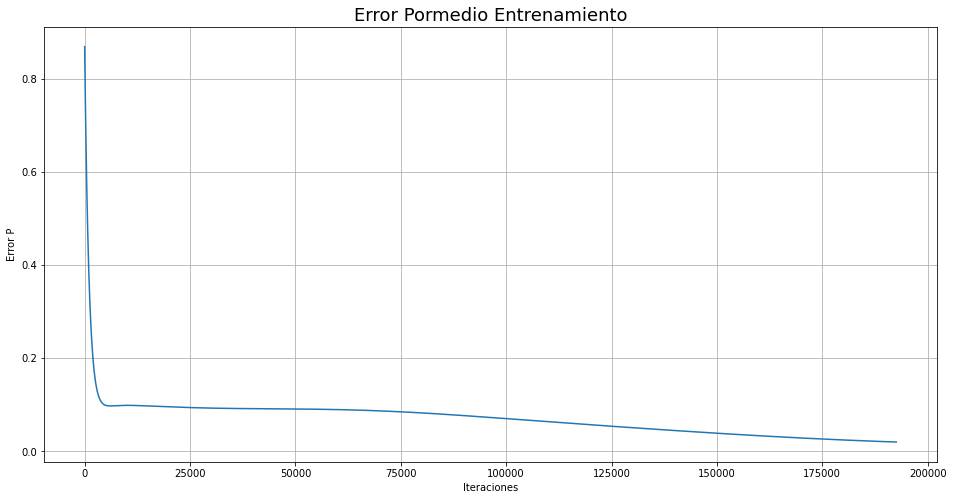

In [160]:
print('Pesos Optimos wi \n', wi, '\n\n')
print('Pesos Optimos wk \n', wk, '\n\n')
# Make the plot\n",
plt.figure(figsize=(16,8)) #Tamaño de la figura \n",
plt.plot(Ehistorico)
plt.xlabel("Iteraciones")
plt.ylabel("Error P")
plt.title("Error Pormedio Entrenamiento", fontsize = 18)
plt.grid()
plt.show()


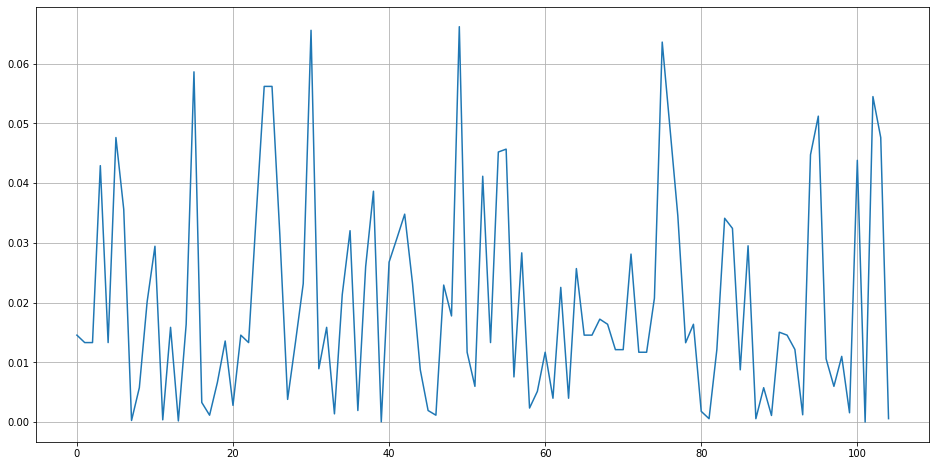

In [161]:
plt.figure(figsize=(16,8)) #Tamaño de la figura \n",
plt.plot(Etemporada)
plt.grid()

## Error de entrenamiento

In [187]:
z = 0 #Variable de salida al usuario
contErrPrueba = 0
E = []

for i in range(len(d_train_aleatorio)):  #Recorrer el data set de prueba
  x[0] = d_train_aleatorio.iloc[i,0]     #Leer los descriptores de la fila i
  x[1] = d_train_aleatorio.iloc[i,1]
  x[2] = 1                               #Cargar el Bias
  y = d_train_aleatorio.iloc[i,2]        #Leer la clase esperada
  
  aj = np.dot(wi,x)                     #estado interno  de capa oculta
  zj = funcion_activacion(aj)           #Salida de capa oculta
  zj = np.append(zj,1)                 #Agregar Bias capa oculta
  
  ak = np.dot(wk,zj)                #estado inetrno de salida, ie, salida                             #Pasar el dato Xi por la red
  e = 0.5*(ak - y)**2                                      #error lineal para cada elemento  
  E.append(np.abs(e))
  #x = np.dot(x,e)
  #print(f'g:{ak}, y:{y}, e:{e}')

  #Traductor al cliente
  z = classFunBack(ak, a, b)
    
  #print(f'flor:{str(i)}  NN: {z}, Orig {y} , Error:({y-z}) ')

  if (y != z):
    contErrPrueba += 1
    print(f'g:{ak}, y:{y}, e:{e}')


porcentajeErrorP = contErrPrueba / len(d_train_aleatorio)
print('\nTotal Errores', contErrPrueba, 'Porcentaje', porcentajeErrorP, 'Ep', np.mean(E))

g:0.6647333604285018, y:0.5, e:0.013568540019033348
g:0.6377990652712824, y:1.0, e:0.06559475855917837
g:0.6361302616518321, y:1.0, e:0.0662005932427821
g:0.643292218600914, y:1.0, e:0.06362022065532906
g:0.6629630044163585, y:0.5, e:0.013278470404203034
g:0.6559128514481506, y:0.5, e:0.012154408623346538

Total Errores 6 Porcentaje 0.05714285714285714 Ep 0.01999959300107877


## Prueba de la red


In [182]:
z = 0 #Variable de salida al usuario
contErrPrueba = 0
dfPrueba = pd.DataFrame(columns=['i', 'NN', 'Objetivo', 'Error'])
print('Salida ---------- Objetivo ------ Error')
for i in range(len(data_test_norm_aleatorio)):  #Recorrer el data set de prueba
  x[0] = data_test_norm_aleatorio.iloc[i,0]     #Leer los descriptores de la fila i
  x[1] = data_test_norm_aleatorio.iloc[i,1]
  x[2] = 1                                       #Cargar el Bias
  y = data_test_norm_aleatorio.iloc[i,2]        #Leer la clase esperada
  aj = np.dot(wi,x)                     #estado interno  de capa oculta
  zj = funcion_activacion(aj)           #Salida de capa oculta
  zj = np.append(zj,1)                 #Agregar Bias capa oculta
  
  ak = np.dot(wk,zj)                #estado inetrno de salida, ie, salida                              #Pasar el dato Xi por la red
  e = ak - y                                      #error lineal para cada elemento  
  #x = np.dot(x,e)
  

  #Traductor al cliente
  z = classFunBack(ak, a, b)
  Err = 'No'
    
  #print(f'flor:{str(i)}  NN: {z}, Orig {y} , Error:({y-z}) ')

  if (y != z):
    contErrPrueba += 1
    Err = 'SI'
  print(f'g:{ak}, y:{y}, e:{e}')
  
  #print(f'flor:{str(i)} NN: {z}, \t Orig {y} , Error?: {Err} ')
  dfPrueba.loc[i] = [i, z, y, Err]

porcentajeErrorP = contErrPrueba / len(data_test_norm)
print('\nTotal Errores', contErrPrueba, 'Porcentaje', porcentajeErrorP)
dfPrueba

Salida ---------- Objetivo ------ Error
g:0.5539049658568918, y:0.5, e:0.05390496585689175
g:0.6942241594770745, y:1.0, e:-0.3057758405229255
g:0.16724970468239875, y:0.0, e:0.16724970468239875
g:0.23480721038849495, y:0.0, e:0.23480721038849495
g:0.557127763163616, y:0.5, e:0.05712776316361601
g:0.7273364432504966, y:1.0, e:-0.2726635567495034
g:0.7450405262426598, y:1.0, e:-0.2549594737573402
g:0.7034425386248357, y:1.0, e:-0.29655746137516426
g:0.670244345869246, y:1.0, e:-0.32975565413075403
g:0.5475465195272875, y:0.5, e:0.0475465195272875
g:0.6919990173786763, y:1.0, e:-0.3080009826213237
g:0.6991124345186042, y:1.0, e:-0.30088756548139584
g:0.18590390720264538, y:0.0, e:0.18590390720264538
g:0.619838002541972, y:0.5, e:0.11983800254197197
g:0.7993004939949158, y:1.0, e:-0.20069950600508424
g:0.7639105029837108, y:1.0, e:-0.23608949701628923
g:0.14157250912365515, y:0.0, e:0.14157250912365515
g:0.6084361062128303, y:0.5, e:0.10843610621283029
g:0.6084361062128303, y:0.5, e:0.1084

,i,NN,Objetivo,Error
0,0,0.5,0.5,No
1,1,1.0,1.0,No
2,2,0.0,0.0,No
3,3,0.0,0.0,No
4,4,0.5,0.5,No
5,5,1.0,1.0,No
6,6,1.0,1.0,No
7,7,1.0,1.0,No
8,8,1.0,1.0,No
9,9,0.5,0.5,No


## Validación de la Red

In [188]:
z = 0 #Variable de salida al usuario
contErrValid = 0
dfValid = pd.DataFrame(columns=[ 'NN', 'Objetivo', 'Error'])

for i in range(len(data_valid_norm_aleatorio)):  #Recorrer el data set de prueba
  x[0] = data_valid_norm_aleatorio.iloc[i,0]     #Leer los descriptores de la fila i
  x[1] = data_valid_norm_aleatorio.iloc[i,1]
  x[2] = 1                                      #Cargar el Bias
  y = data_valid_norm_aleatorio.iloc[i,2]        #Leer la clase esperada
 
  aj = np.dot(wi,x)                     #estado interno  de capa oculta
  zj = funcion_activacion(aj)           #Salida de capa oculta
  zj = np.append(zj,1)                 #Agregar Bias capa oculta
  
  ak = np.dot(wk,zj)                #estado inetrno de salida, ie, salida                               #Pasar el dato Xi por la red
  e = ak - y                                  #error lineal para cada elemento  
  #x = np.dot(x,e)
  #print(f'g:{g}, y:{y}, e:{e}')

  #Traductor al cliente
  z = classFunBack(ak, a, b)
  Err = 'No'
  #print(f'flor:{str(i)}  NN: {z}, Orig {y} , Error:({y-z}) ')

  if (y != z):
    contErrValid += 1
    print(f'g:{ak}, y:{y}, e:{e}')
    Err = 'Si'
  dfValid.loc[i] = [ z, y, Err]

porcentajeErrorV = contErrValid / len(data_valid_norm)

print('\nTotal Errores', contErrValid, 'Porcentaje', porcentajeErrorV)
dfValid

g:0.6570383452158948, y:0.5, e:0.15703834521589477

Total Errores 1 Porcentaje 0.06666666666666667


,NN,Objetivo,Error
0,0,0.0,No
1,1,1.0,No
2,1,1.0,No
3,0.5,0.5,No
4,0.5,0.5,No
5,0,0.0,No
6,0.5,0.5,No
7,0,0.0,No
8,1,1.0,No
9,1,1.0,No


*******************
## Seleccionando el número de neuronas de la capa oculta

In [ ]:
def trainFun(wi, wk):
  z = 0 #Variable de salida al usuario
  contErrPrueba = 0
  E = []

  for i in range(len(data_test_norm_aleatorio)):  #Recorrer el data set de prueba
    x[0] = data_test_norm_aleatorio.iloc[i,0]     #Leer los descriptores de la fila i
    x[1] = data_test_norm_aleatorio.iloc[i,1]
    x[2] = 1                              #Cargar el Bias
    y = data_test_norm_aleatorio.iloc[i,2]        #Leer la clase esperada
    aj = np.dot(wi,x)                 #estado interno  de capa oculta
    aj = np.append(aj,1)              #Agregar Bias
    ak = np.dot(wk,aj)                #estado inetrno de salida, ie, salida                             #Pasar el dato Xi por la red
    e = ak - y                                      #error lineal para cada elemento  
    e = 0.5*(e)**2 
    E.append(np.abs(e))
    #x = np.dot(x,e)
    #print(f'g:{ak}, y:{y}, e:{e}')

    #Traductor al cliente
    z = classFunBack(ak, a, b)
      
    #print(f'flor:{str(i)}  NN: {z}, Orig {y} , Error:({y-z}) ')

    if (y != z):
      contErrPrueba += 1
      #print(f'g:{ak}, y:{y}, e:{e}')


  porcentajeErrorP = contErrPrueba / len(data_test_norm_aleatorio)
  #print('\nTotal Errores', contErrPrueba, 'Porcentaje', porcentajeErrorP, 'Ep', np.mean(E))
  return(np.mean(E), porcentajeErrorP)

In [ ]:
# variando neuronas


def capa_oculta(a,b):
    return np.random.rand(a,b),np.random.rand(a+1)
    #return np.ones([a,b]), np.ones([a+1])

Eneuronas  = []
Etest = [] 
pTest = []
a = 0
b = 0
for j in range(2, 42,4):
  wi, wk = capa_oculta(j,3)
  e_min = 0.02

  x  = np.zeros(3)                  # Vector de entradas)
  mu = 1e-6             #Paso
  dj = []                #delta j 
  dk = []
  aj = []               #estado interno de neuronas capa oculta
  ak = []               #Esado interno de neurona de salida, salida 
  dEj = np.zeros(1)     #gradiente de error respecto a Wj
  dEk = np.multiply(dk, aj)
    
  for k in range(len(dj)-1):
      dEj [k,:]= np.dot(x,dj[k])
      #Fin del for
  E = 0 #Error de iteración
  Etemporada = []
  Ehistorico = []

  
  Ep = 0
  flag = True
  cont = 0

  while(flag):
      Etemporada = []   #Vaciar error de temporada anterior
      
      for i in range(len(d_train_aleatorio)): #Recorere el data set de entrenamiento
          x[0] = d_train_aleatorio.iloc[i,0]      #Leer Descriptores de fila i
          x[1] = d_train_aleatorio.iloc[i,1]
          x[2] = 1                                #Bias
          y = d_train_aleatorio.iloc[i,2]         #Leer la clase de la fila i

          aj = np.dot(wi,x)                 #estado interno  de capa oculta
          aj = np.append(aj,1)              #Agregar Bias
          ak = np.dot(wk,aj)                #estado inetrno de salida, ie, salida

          dk = ak - y
          dj = np.multiply(aj, (np.dot(wk,dk)))

          zi = wi*x
          dEk = np.multiply(dk, aj)
          dEj = np.dot(dj[:-1], zi)
          wi  = wi - mu*dEj 
          wk  = wk - mu*dEk 

          E = 0.5*(ak - y)**2
          Etemporada.append(np.abs(E))

      Ep = np.mean(Etemporada)
      Ehistorico.append(Ep)
      #print('Error promedio', Ep)
      cont += 1
      if(Ep <= e_min):
          flag = False
          Eneuronas.append(Ep)
      
      if(cont > 15000 ):
        flag = False
        Eneuronas.append(Ep)
  a, b = trainFun( wi, wk)
  Etest.append(a)
  pTest.append(b)

  print('Iteraciones', cont)
  print('j', j)


Iteraciones 7501
j 2
Iteraciones 4856
j 6
Iteraciones 15001
j 10
Iteraciones 3481
j 14
Iteraciones 7323
j 18
Iteraciones 2770
j 22
Iteraciones 6148
j 26
Iteraciones 2782
j 30
Iteraciones 2888
j 34
Iteraciones 5463
j 38


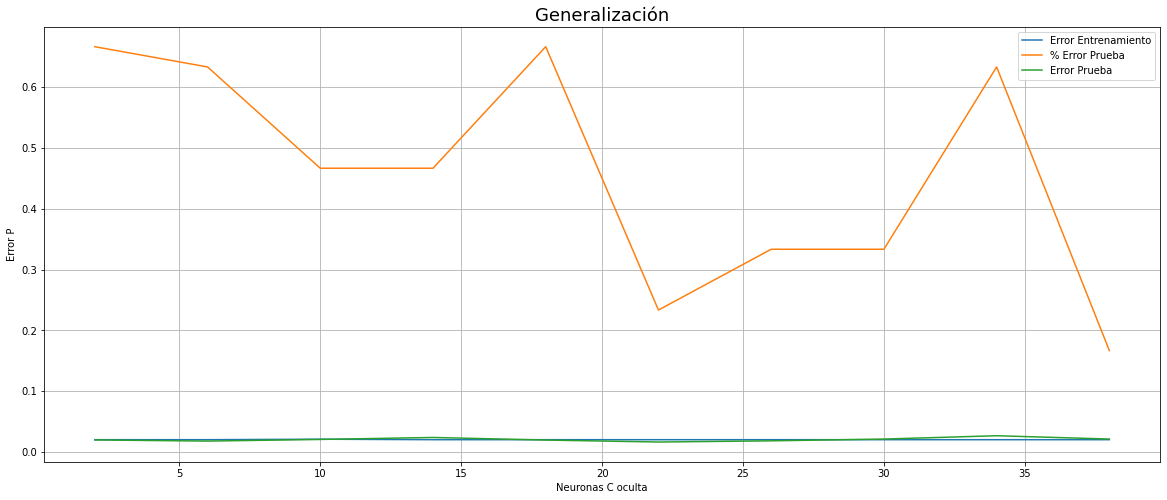

In [ ]:
# Make the plot\n",
x = np.arange(2, 42, 4)
plt.figure(figsize=(20,8)) #Tamaño de la figura \n",
plt.plot(x,Eneuronas)
plt.plot(x,pTest)
plt.plot(x,Etest)
plt.xlabel("Neuronas C oculta")
plt.ylabel("Error P")
plt.title("Generalización", fontsize = 18)
plt.legend(['Error Entrenamiento', '% Error Prueba', 'Error Prueba'])
plt.grid()
plt.show()

In [ ]:
wi

array([[ 0.06536331, -0.07429788, -0.27640058],
       [ 0.13821965,  0.36678213, -0.02264438],
       [-0.26697046,  0.41426648, -0.28174724],
       [-0.42870291,  0.30163825, -0.1313164 ],
       [ 0.00172409, -0.00958909,  0.31840573],
       [ 0.54744712, -0.3577511 ,  0.12884363],
       [ 0.23281284, -0.34337334,  0.26014098],
       [ 0.07634808, -0.31896738, -0.35309052],
       [ 0.2476594 , -0.27385466,  0.28857568],
       [ 0.34063683, -0.18236074, -0.45608033],
       [-0.24703901,  0.0256409 , -0.00915021],
       [-0.16074631,  0.41930441, -0.10886092],
       [ 0.06401227,  0.36440484,  0.04031831],
       [-0.16853395, -0.14053068, -0.19463568],
       [-0.17106562,  0.32598465,  0.15076393],
       [ 0.32532658,  0.26416852, -0.35686978],
       [ 0.47887416, -0.06407767,  0.26922164],
       [ 0.08421688, -0.34109227, -0.02510936],
       [ 0.16828259,  0.03246317,  0.28804885],
       [-0.29708861,  0.34501095,  0.00064281],
       [-0.22728116,  0.45263038, -0.273

In [ ]:
a, b = trainFun( wi, wk)

ValueError: ignored

# Punto 5

Red monocapa 1 neurona, función de activiación lineal, 5 entradas, 4 desxriptores + Bias

## Carga de datos


In [60]:
#Cargar datos de entrenamiento 
d_train = pd.read_excel('Datos_Train.xlsx')
#d_train = data_train_norm.copy()
del d_train["index"]
del d_train["nombre"]
del d_train["Unnamed: 0"]
d_train = d_train.apply(lambda x: (x-x.min())/ (x.max()- x.min()), axis=0)
vector_random = np.arange(0,len(d_train))
np.random.shuffle(vector_random)
d_train_aleatorio = pd.DataFrame(columns=['x1', 'x2','x3','x4','clase'])
for i in range(len(vector_random)):
  d_train_aleatorio.loc[i] = d_train.iloc[vector_random[i]]

bias = np.ones(len(d_train))
#d_train_aleatorio.insert(4,"bias",bias)
d_train_aleatorio


,x1,x2,x3,x4,clase
0,0.000000,0.416667,0.052632,0.041667,0.0
1,0.171429,0.583333,0.087719,0.041667,0.0
2,0.371429,0.208333,0.701754,0.791667,1.0
3,0.771429,0.416667,0.859649,0.833333,1.0
4,0.228571,0.875000,0.087719,0.000000,0.0
...,...,...,...,...,...
100,0.314286,0.916667,0.070175,0.041667,0.0
101,0.542857,0.333333,0.719298,0.583333,1.0
102,0.542857,0.375000,0.807018,0.708333,1.0
103,0.228571,0.625000,0.087719,0.041667,0.0


In [67]:
#Cargar datos de Prueba 
d_test = pd.read_excel('Datos_Test.xlsx')
del d_test["index"]
del d_test["nombre"]
del d_test["Unnamed: 0"]
d_test = d_test.apply(lambda x: (x-x.min())/ (x.max()- x.min()), axis=0)
vector_random = np.arange(0,len(d_test))
np.random.shuffle(vector_random)
d_test_aleatorio = pd.DataFrame(columns=['x1', 'x2','x3','x4','clase'])
for i in range(len(vector_random)):
  d_test_aleatorio.loc[i] = d_test.iloc[vector_random[i]]

bias = np.ones(len(d_test))
#d_test_aleatorio.insert(2,"bias",bias)
d_test_aleatorio


,x1,x2,x3,x4,clase
0,0.352941,0.1250,0.500000,0.521739,0.5
1,0.617647,0.5000,0.758621,0.739130,1.0
2,0.235294,0.6250,0.103448,0.173913,0.0
3,0.764706,0.5000,0.741379,0.869565,1.0
4,0.735294,0.4375,0.758621,0.869565,1.0
5,0.235294,0.8750,0.068966,0.130435,0.0
6,0.323529,0.6875,0.068966,0.130435,0.0
7,0.647059,0.5625,0.689655,0.826087,1.0
8,0.323529,1.0000,0.034483,0.130435,0.0
9,0.588235,0.6875,0.775862,1.000000,1.0


In [66]:
#Cargar datos de Validación
d_valid = pd.read_excel('Datos_Validation.xlsx')
del d_valid["index"]
del d_valid["nombre"]
del d_valid["Unnamed: 0"]
d_valid = d_valid.apply(lambda x: (x-x.min())/ (x.max()- x.min()), axis=0)
vector_random = np.arange(0,len(d_valid))
np.random.shuffle(vector_random)
d_valid_aleatorio = pd.DataFrame(columns=['x1', 'x2','x3','x4','clase'])
for i in range(len(vector_random)):
  d_valid_aleatorio.loc[i] = d_valid.iloc[vector_random[i]]

bias = np.ones(len(d_valid))
d_valid_aleatorio

,x1,x2,x3,x4,clase
0,0.833333,0.352941,0.934783,0.869565,1.0
1,0.625000,0.470588,0.630435,0.565217,0.5
2,1.000000,0.588235,1.000000,0.913043,1.0
3,0.375000,0.882353,0.043478,0.000000,0.0
4,0.125000,0.588235,0.065217,0.000000,0.0
5,0.833333,0.588235,0.869565,0.913043,1.0
6,0.958333,0.647059,0.956522,1.000000,1.0
7,0.416667,1.000000,0.086957,0.086957,0.0
8,0.791667,0.647059,0.739130,0.608696,0.5
9,0.750000,0.000000,0.695652,0.565217,0.5


## Entrenamiento

In [73]:
# Iniciar con unos pesos aleatorios
wo = np.random.rand(5)

x = [0,0,0,0,0] #Vector de entradas
E = []      #Vector de errores por cada entrada
e_min = 0.1  #Error minimo objetivo
mu = 1e-6    #Paso
Ep = 1.0      #Error Promedio de epoca
flag = True   #Bandera de terminación de algoritmo
cont = 0      #Contador de Iteraciones del while
errorHist = []#Vector historico de error promedio

while(flag):
  E = []      #Vaciar vector de errores 

  for i in range(len(d_train_aleatorio)):   #Recorere el data set de entrenamiento
    x[0] = d_train_aleatorio.iloc[i,0]      #Leer Descriptores de fila i
    x[1] = d_train_aleatorio.iloc[i,1]
    x[2] = d_train_aleatorio.iloc[i,2]
    x[3] = d_train_aleatorio.iloc[i,3]
    x[4] = 1                                #Agregar el Bias
    y = d_train_aleatorio.iloc[i,4]         #Leer la clase de la fila i
    g = np.dot(x,wo)                        #Computar el estado interno de la neurona
    e = g-y                                 #Error para la muestra i
    x =  np.dot(x,e)
    wo = wo-np.multiply(x,mu)               #Actualizar Vector de Pesos
    E.append(np.abs(e))                             #Almacenar error de cada muestra para calcular error promedio
  cont = cont+1                             #Incrementar el contador de iteraciones del while
  Ep = np.mean(E)                           #Calcular error promedio
  errorHist.append(Ep)                      #Almacenar Err promedio
  print(Ep)
  if(Ep <= e_min):
    flag = False
print('Iteraciones', cont)



Se han truncado las últimas 5000 líneas del flujo de salida.
0.10041114985714367
0.10041106704554371
0.1004109842341585
0.10041090142298816
0.10041081861203259
0.10041073580129185
0.10041065299076588
0.10041057018045471
0.10041048737035839
0.10041040456047684
0.10041032175081015
0.10041023894135818
0.10041015613212104
0.10041007332309872
0.10040999051429121
0.10040990770569844
0.10040982489732055
0.10040974208915739
0.10040965928120904
0.10040957647347555
0.10040949366595682
0.10040941085865288
0.10040932805156379
0.10040924524468947
0.10040916243802997
0.10040907963158525
0.10040899682535533
0.10040891401934021
0.10040883121353987
0.10040874840795436
0.10040866560258364
0.10040858279742772
0.10040849999248659
0.1004084171877603
0.10040833438324875
0.10040825157895204
0.1004081687748701
0.10040808597100297
0.1004080031673506
0.1004079203639131
0.10040783756069038
0.10040775475768242
0.10040767195488928
0.10040758915231095
0.10040750634994737
0.10040742354779864
0.1004073407458647
0.100

Pesos Optimos  [ 0.28306235  0.04620028  0.40390665  0.68869979 -0.1469762 ] 




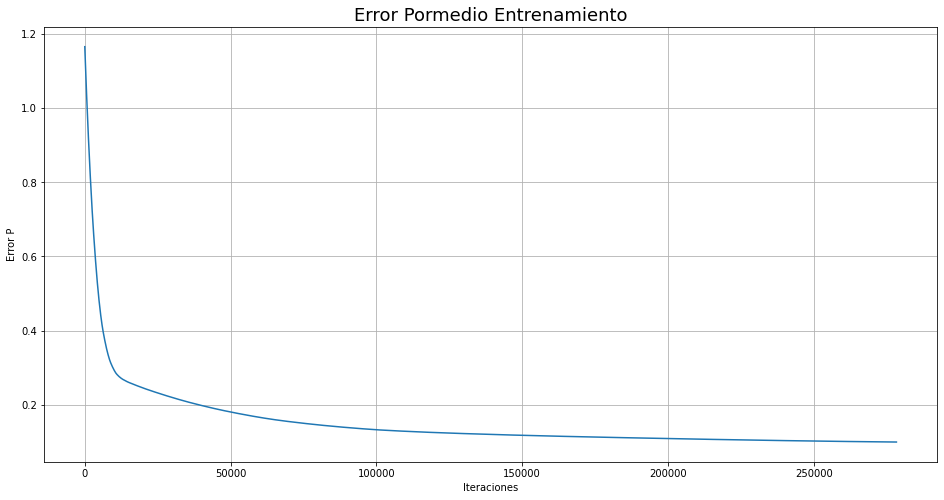

In [74]:
print('Pesos Optimos ', wo, '\n\n')
# Make the plot\n",
plt.figure(figsize=(16,8)) #Tamaño de la figura \n",
plt.plot(errorHist)
plt.xlabel("Iteraciones")
plt.ylabel("Error P")
plt.title("Error Pormedio Entrenamiento", fontsize = 18)
plt.grid()
plt.show()

## Fronteras de desición

In [96]:
a = 0.25
b = 0.75

## Error de entrenamiento


In [79]:
z = 0 #Variable de salida al usuario
x = [0,0,0,0,0] #Vector de entradas
contErrPrueba = 0

for i in range(len(d_train_aleatorio)):  #Recorrer el data set de prueba
  x[0] = d_train_aleatorio.iloc[i,0]      #Leer Descriptores de fila i
  x[1] = d_train_aleatorio.iloc[i,1]
  x[2] = d_train_aleatorio.iloc[i,2]
  x[3] = d_train_aleatorio.iloc[i,3]
  x[4] = 1                                #Agregar el Bias
  y = d_train_aleatorio.iloc[i,4]         #Leer la clase de la fila i
  g = np.dot(x,wo)                              #Pasar el dato Xi por la red
  e = g - y                                      #error lineal para cada elemento  
  #x = np.dot(x,e)
  #print(f'g:{g}, y:{y}, e:{e}')

  #Traductor al cliente
  z = classFunBack(g, a, b)
    
  #print(f'flor:{str(i)}  NN: {z}, Orig {y} , Error:({y-z}) ')

  if (y != z):
    contErrPrueba += 1
    print(f'g:{g}, y:{y}, e:{e}')


porcentajeErrorP = contErrPrueba / len(d_train_aleatorio)
print('\nTotal Errores', contErrPrueba, 'Porcentaje', porcentajeErrorP)

g:0.6714585628367631, y:1.0, e:-0.3285414371632369
g:0.8008627747885493, y:0.5, e:0.3008627747885493
g:0.701066769450305, y:1.0, e:-0.298933230549695
g:0.7545364936088355, y:0.5, e:0.25453649360883546
g:0.6102323860330929, y:1.0, e:-0.38976761396690707
g:0.754485046942186, y:0.5, e:0.254485046942186
g:0.7143572009559653, y:1.0, e:-0.28564279904403467

Total Errores 7 Porcentaje 0.06666666666666667


## Prueba


In [87]:
z = 0 #Variable de salida al usuario
contErrPrueba = 0
E = [] 
dfPrueba = pd.DataFrame(columns=['i', 'NN', 'Objetivo', 'Error'])
for i in range(len(d_test_aleatorio)):  #Recorrer el data set de prueba
  x[0] = d_test_aleatorio.iloc[i,0]      #Leer Descriptores de fila i
  x[1] = d_test_aleatorio.iloc[i,1]
  x[2] = d_test_aleatorio.iloc[i,2]
  x[3] = d_test_aleatorio.iloc[i,3]
  x[4] = 1                                #Agregar el Bias
  y = d_test_aleatorio.iloc[i,4]         #Leer la clase de la fila i
  g = np.dot(x,wo)                              #Pasar el dato Xi por la red
  e = g - y                                      #error lineal para cada elemento  
  #x = np.dot(x,e)
  E.append(np.abs(e))
  #print(f'g:{g}, y:{y}, e:{e}')

  #Traductor al cliente
  z = classFunBack(g, a, b)
    
  #print(f'flor:{str(i)}  NN: {z}, Orig {y} , Error:({y-z}) ')

  Err = 'No'
  if (y != z):
    contErrPrueba += 1
    print(f'g:{g}, y:{y}, e:{e}')
    Err = 'Si'
  dfPrueba.loc[i] = [i, z, y, Err]


porcentajeErrorP = contErrPrueba / len(d_test_aleatorio)
print('\nTotal Errores', contErrPrueba, 'Porcentaje', porcentajeErrorP, 'Err Lineal', np.mean(E))
dfPrueba


Total Errores 0 Porcentaje 0.0 Err Lineal 0.094267553094244


,i,NN,Objetivo,Error
0,0,0.5,0.5,No
1,1,1.0,1.0,No
2,2,0.0,0.0,No
3,3,1.0,1.0,No
4,4,1.0,1.0,No
5,5,0.0,0.0,No
6,6,0.0,0.0,No
7,7,1.0,1.0,No
8,8,0.0,0.0,No
9,9,1.0,1.0,No


## Validación

In [88]:
z = 0 #Variable de salida al usuario
contErrPrueba = 0
E = []
dfValid = pd.DataFrame(columns=['i', 'NN', 'Objetivo', 'Error'])

for i in range(len(d_valid_aleatorio)):  #Recorrer el data set de prueba
  x[0] = d_valid_aleatorio.iloc[i,0]      #Leer Descriptores de fila i
  x[1] = d_valid_aleatorio.iloc[i,1]
  x[2] = d_valid_aleatorio.iloc[i,2]
  x[3] = d_valid_aleatorio.iloc[i,3]
  x[4] = 1                                #Agregar el Bias
  y = d_valid_aleatorio.iloc[i,4]         #Leer la clase de la fila i
  g = np.dot(x,wo)                              #Pasar el dato Xi por la red
  e = g - y                                      #error lineal para cada elemento  
  E.append(np.abs(e))
  #x = np.dot(x,e)
  #print(f'g:{g}, y:{y}, e:{e}')

  #Traductor al cliente
  z = classFunBack(g, a, b)
    
  #print(f'flor:{str(i)}  NN: {z}, Orig {y} , Error:({y-z}) ')
  Err = 'No'
  if (y != z):
    contErrPrueba += 1
    print(f'g:{g}, y:{y}, e:{e}')
    Err = 'Si'
  dfValid.loc[i] = [i, z, y, Err]

porcentajeErrorP = contErrPrueba / len(d_valid_aleatorio)
print('\nTotal Errores', contErrPrueba, 'Porcentaje', porcentajeErrorP, 'Err Lineal', np.mean(E))
dfValid

g:0.8247573910967543, y:0.5, e:0.3247573910967543

Total Errores 1 Porcentaje 0.06666666666666667 Err Lineal 0.12862065056527913


,i,NN,Objetivo,Error
0,0,1,1.0,No
1,1,0.5,0.5,No
2,2,1,1.0,No
3,3,0,0.0,No
4,4,0,0.0,No
5,5,1,1.0,No
6,6,1,1.0,No
7,7,0,0.0,No
8,8,1,0.5,Si
9,9,0.5,0.5,No


##Multicapa 4 caracteristicas



In [ ]:
# Vectores de pesos
e_min = 0.02
wi = np.random.rand(3,5) # pesos de las entradas hacia la capa oculta
wk = np.random.rand(4)   # pesos de la capa oculta hacia la de salida
x  = np.zeros(5)                  # Vector de entradas)
mu = 1e-6             #Paso
dj = []                #delta j 
dk = []
aj = []               #estado interno de neuronas capa oculta
ak = []               #Esado interno de neurona de salida, salida 
dEj = np.zeros(1)     #gradiente de error respecto a Wj
dEk = np.zeros(1)     #gradiente de error respecto a Wk
zi =  np.zeros([3,3])
E = 0 #Error de iteración
Etemporada = []
Ehistorico = []
Ep = 0
flag = True
cont = 0


In [ ]:

while(flag):
  Etemporada = []   #Vaciar error de temporada anterior
  
  for i in range(len(d_train_aleatorio)): #Recorere el data set de entrenamiento
    x[0] = d_train_aleatorio.iloc[i,0]      #Leer Descriptores de fila i
    x[1] = d_train_aleatorio.iloc[i,1]
    x[2] = d_train_aleatorio.iloc[i,2]
    x[3] = d_train_aleatorio.iloc[i,3]
    x[4] = 1                                #Agregar el Bias
    y = d_train_aleatorio.iloc[i,4]         #Leer la clase de la fila i

    aj = np.dot(wi,x)                 #estado interno  de capa oculta
    aj = np.append(aj,1)              #Agregar Bias
    ak = np.dot(wk,aj)                #estado inetrno de salida, ie, salida
    
    dk = ak -y
    dj = np.multiply(aj, (np.dot(wk,dk)))

    zi = wi*x
    dEk = np.multiply(dk, aj)
    dEj = np.dot(dj[:-1], zi)
    wi  = wi - mu*dEj 
    wk  = wk - mu*dEk 

    E = 0.5*(ak - y)**2
    Etemporada.append(np.abs(E))

  Ep = np.mean(Etemporada)
  Ehistorico.append(Ep)
  print('Error promedio', Ep)
  if(Ep <= e_min):
    flag = False
  cont += 1
  
print('Iteraciones', cont)


Se han truncado las últimas 5000 líneas del flujo de salida.
Error promedio 0.02100778415321192
Error promedio 0.02100757513992667
Error promedio 0.021007366129613347
Error promedio 0.021007157122271997
Error promedio 0.021006948117902616
Error promedio 0.021006739116505174
Error promedio 0.021006530118079663
Error promedio 0.021006321122626067
Error promedio 0.021006112130144406
Error promedio 0.021005903140634618
Error promedio 0.021005694154096748
Error promedio 0.021005485170530733
Error promedio 0.021005276189936566
Error promedio 0.021005067212314273
Error promedio 0.02100485823766382
Error promedio 0.02100464926598518
Error promedio 0.02100444029727842
Error promedio 0.021004231331543444
Error promedio 0.021004022368780267
Error promedio 0.0210038134089889
Error promedio 0.021003604452169287
Error promedio 0.021003395498321486
Error promedio 0.02100318654744541
Error promedio 0.02100297759954107
Error promedio 0.02100276865460851
Error promedio 0.021002559712647643
Error promedi

### Error de entrenamiento


In [ ]:
z = 0 #Variable de salida al usuario
contErrPrueba = 0

for i in range(len(d_train_aleatorio)):  #Recorrer el data set de prueba
  x[0] = d_train_aleatorio.iloc[i,0]      #Leer Descriptores de fila i
  x[1] = d_train_aleatorio.iloc[i,1]
  x[2] = d_train_aleatorio.iloc[i,2]
  x[3] = d_train_aleatorio.iloc[i,3]
  x[4] = 1                                #Agregar el Bias
  aj = np.dot(wi,x)                 #estado interno  de capa oculta
  aj = np.append(aj,1)              #Agregar Bias
  ak = np.dot(wk,aj)                #estado inetrno de salida, ie, salida                             #Pasar el dato Xi por la red
  e = ak - y                                      #error lineal para cada elemento  
  np.append(E,np.abs(e))
  #x = np.dot(x,e)
  #print(f'g:{ak}, y:{y}, e:{e}')

  #Traductor al cliente
  z = classFunBack(ak, a, b)
    
  #print(f'flor:{str(i)}  NN: {z}, Orig {y} , Error:({y-z}) ')

  if (y != z):
    contErrPrueba += 1
    print(f'g:{ak}, y:{y}, e:{e}')

porcentajeErrorP = contErrPrueba / len(d_train_aleatorio)
print('\nTotal Errores', contErrPrueba, 'Porcentaje', porcentajeErrorP, 'Ep', np.mean(E))

g:1.0042924977700725, y:0.5, e:0.5042924977700725
g:0.24811570879545225, y:0.5, e:-0.25188429120454775
g:0.9503464048820021, y:0.5, e:0.45034640488200206
g:0.12842584301325827, y:0.5, e:-0.37157415698674173
g:0.2356065210350476, y:0.5, e:-0.2643934789649524
g:0.872796303675677, y:0.5, e:0.37279630367567695
g:0.16930193203483312, y:0.5, e:-0.3306980679651669
g:0.9049572020497731, y:0.5, e:0.40495720204977315
g:0.1487297346270045, y:0.5, e:-0.3512702653729955
g:0.17748255582807826, y:0.5, e:-0.32251744417192174
g:0.22450579794272835, y:0.5, e:-0.27549420205727165
g:0.12974702526628268, y:0.5, e:-0.3702529747337173
g:1.0381882293194964, y:0.5, e:0.5381882293194964
g:0.1941451867110911, y:0.5, e:-0.3058548132889089
g:0.7640409131257644, y:0.5, e:0.2640409131257644
g:0.22259049740280862, y:0.5, e:-0.2774095025971914
g:0.1831323020482622, y:0.5, e:-0.3168676979517378
g:0.857795443057485, y:0.5, e:0.357795443057485
g:0.22200525210042682, y:0.5, e:-0.2779947478995732
g:0.21990892818148605, y:0